1. read file
2. pick only the lines with a DNA seq
3. find the longest A's streak
4. define the distibution of the nucleotides 
5. define the %  of each nucleotide in each cycle 


# Find the longest streak of 'A' Nucleotide

In [200]:
%%time
# count dna_reads in a file
# open file 
path_to_file = '/Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R1_001.fastq'
dna_reads = []
n = 160000 # number of lines in a file

# make lists of dna reads
with open(path_to_file, 'r') as f:   # f = open(path_to_file, 'r') # f is a variable with a file
    for line_number in range(n):
        if line_number in range(1,n,4):
            s = f.readline()
            s = s.replace('\n', '')
            dna_reads.append(s)
        else:
            next(f)

CPU times: user 243 ms, sys: 32.5 ms, total: 275 ms
Wall time: 335 ms


In [201]:
def histo(d, plot_title='empty title'):
    """show a histogram based on dictionary"""
    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = 15, 6

    plt.bar(range(len(d)), d.values(), align='center')
    plt.xticks(range(len(d)), list(sorted(d.keys())))
    plt.title(plot_title)
    plt.show()


In [202]:
def longest_a_streak(dna):
    
    counter = 0 
    longest_streak = 0 #variable must be defined
    for base in dna: 
        if base == 'A':
            counter = counter + 1
            if counter > longest_streak:
                longest_streak = counter
        else:
            counter = 0
    return longest_streak

In [203]:
%%time
result = list()
for s in dna_reads:
    result.append(longest_a_streak(s))

CPU times: user 253 ms, sys: 4.69 ms, total: 258 ms
Wall time: 267 ms


In [204]:
d = dict() # d = {}
for r in result:
    if r not in d.keys():
        d[r] = 1
    else:
        d[r] += 1

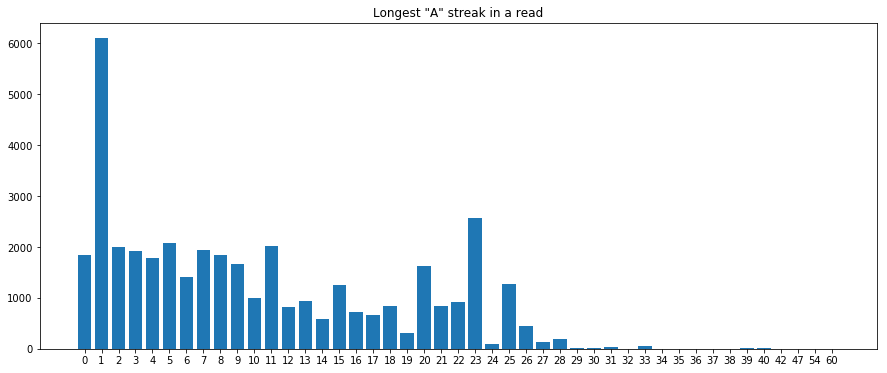

In [205]:
histo(d, plot_title='Longest "A" streak in a read')

# Total 'A' count in a read

In [206]:
result = []
counter_A = 0
for s in dna_reads:
    for base in s:
        if base == 'A':
            counter_A += 1
    result.append(counter_A)
    counter_A = 0
            
print(result[0:10])
print(len(result))

[28, 16, 17, 31, 29, 23, 29, 12, 31, 18]
40000


In [207]:
d = dict()
for r in result:
    if r in d.keys():
        d[r] += 1
    else:
        d[r] = 1

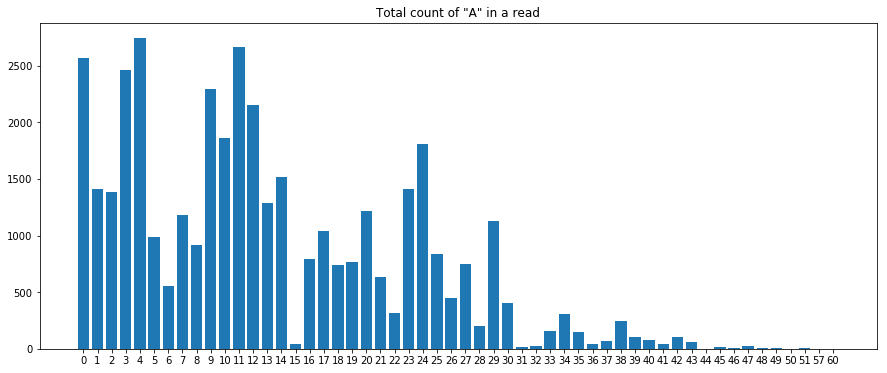

In [208]:
histo(d, plot_title='Total count of "A" in a read')

# Count DNA reads by pool 

In [209]:
d = {
'ACAG': 0,
'AGTC': 0,
'ATCA': 0,
'CATG': 0,
'CTAC': 0,
'TCTA': 0,
'TGAT': 0,
'TTGG': 0,
'unknown': 0
}

In [210]:
%time
for s in dna_reads:
    pool = s[3:7] 
    if pool in d.keys():
        d[pool] += 1
    else:
        d['unknown'] += 1



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [211]:
print(d)

{'ACAG': 6374, 'AGTC': 7039, 'ATCA': 5960, 'CATG': 6634, 'CTAC': 7194, 'TCTA': 1, 'TGAT': 0, 'TTGG': 5564, 'unknown': 1234}


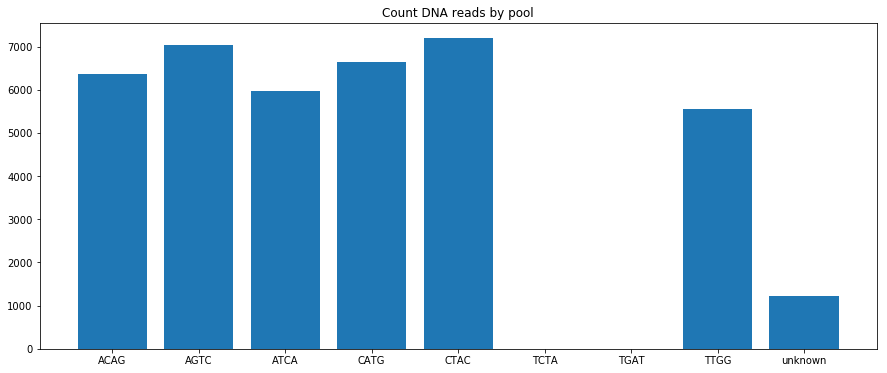

In [212]:
histo(d, plot_title='Count DNA reads by pool')

In [213]:
%whos

Variable             Type             Data/Info
-----------------------------------------------
a_count              int              0
a_list               list             n=7
artefact             str              AAAATGN
base                 str              C
c                    int              1
c_count              int              0
c_list               list             n=7
consensus            tuple            n=4
counter_A            int              0
d                    dict             n=9
data                 list             n=7
dna_reads            list             n=40000
f                    TextIOWrapper    <_io.TextIOWrapper name='<...>ode='r' encoding='UTF-8'>
g_count              int              0
g_list               list             n=7
histo                function         <function histo at 0x1118a6378>
index                int              6
index_of_max_value   int              4
itemgetter           type             <class 'operator.itemgetter'>
line    

# Poly-A tail analysis

In [214]:
def after_polyatail(read, next_n_bases=5, min_len_poly_a=8):
    """
    if a poly A tail length is grater than min_len_poly_a
    go to the end of the tail
    and return next n bases
    """
    counter_a = 0
    bases_after_poly_a = str()
    for index, base in enumerate(read):
        if base == 'A':
            counter_a += 1
        else:
            if counter_a > min_len_poly_a:
                bases_after_poly_a = read[index:index + next_n_bases]
            counter_a = 0
    return bases_after_poly_a

In [215]:
assert after_polyatail("AAAAAAAAAAAAAAAAAAAAAATCCCCCCCCCCCC") == 'TCCCC'
assert after_polyatail("ACACAT") == ''

In [216]:
from collections import Counter

In [218]:
%%time
for i in range(1,10):
    after_a = list()
    for read in dna_reads:
        s = after_polyatail(read, i)
        if s != '': # read didn't have min polyA tail -> returns ''
            after_a.append(s)
    print(Counter(after_a).most_common(6))
print(len(after_a))

[('C', 12249), ('G', 6693), ('T', 6022), ('N', 18)]
[('CC', 4980), ('CA', 3388), ('TC', 2116), ('CG', 2002), ('GC', 1976), ('GG', 1912)]
[('CCC', 2390), ('CAA', 1332), ('CCA', 1099), ('CAC', 1046), ('GAA', 955), ('GGG', 848)]
[('CCCC', 1257), ('CAAA', 645), ('GAAA', 605), ('CCCA', 452), ('GGGG', 442), ('CCAA', 415)]
[('CCCCC', 680), ('GAAAA', 388), ('CAAAA', 346), ('GGGGG', 241), ('CCCCA', 213), ('CCAAA', 197)]
[('CCCCCC', 330), ('GAAAAA', 244), ('CAAAAA', 190), ('GGGGGG', 121), ('CCCCCA', 119), ('CCCCCT', 117)]
[('GAAAAAA', 153), ('CCCCCCC', 148), ('CAAAAAA', 115), ('GGGGGGG', 68), ('CCCCCCT', 62), ('CCCCCCG', 59)]
[('GAAAAAAA', 82), ('CCCCCCCC', 67), ('CAAAAAAA', 64), ('C', 50), ('T', 35), ('GGGGGGGG', 34)]
[('C', 50), ('GAAAAAAAA', 38), ('T', 35), ('G', 28), ('GAAAAGAAA', 26), ('CAAAAAAAA', 24)]
24982
CPU times: user 3.05 s, sys: 24 ms, total: 3.07 s
Wall time: 3.1 s


# Find consensus sequence (= artefact) after Poly A tail

In [231]:
rotated_after_a = [''.join(s) for s in zip(*after_a)] 
# e.g reads = ['AATC','ACTGA','ATG'] -> reads = ['AAA', ACT', 'TTG', 'CG', 'A' ]

In [222]:
# zip functions can be applied only to the lists of strings of the same lengh.
# If the string is shorter than the string with max length -> add space to the string
max_length = (len(max(after_a, key=len)))


for index, s in enumerate(after_a):
    if len(s) != max_length:  # if len of current string is not the same as maximum length
             after_a[index] = s + ' ' * (max_length - len(s)) 

after_a_rotated = ([''.join(s) for s in zip(*after_a)])

In [223]:
#count the
a_count = 0
a_list = []
t_count = 0
t_list = []
g_count = 0
g_list = []
c_count = 0
c_list = []
n_count = 0
n_list = []

for read_list in after_a_rotated:
    for base in read_list:
        if base == 'A':
            a_count += 1
        if base == 'T':
            t_count += 1
        if base == 'G':
            g_count += 1
        if base == 'C':
            c_count += 1
        if base == 'N':
            n_count += 1
    a_list.append(a_count)
    a_count = 0
    n_list.append(n_count)
    n_count = 0
    t_list.append(t_count)
    t_count = 0
    g_list.append(g_count)
    g_count = 0
    c_list.append(c_count)
    c_count = 0
    


In [224]:
print(a_list)
print(t_list)
print(g_list)
print(c_list)
print(n_list)

[0, 6243, 6907, 7049, 6451, 6306, 6073, 6361, 6484]
[6022, 4311, 3960, 4089, 4203, 4751, 5334, 4934, 5198]
[6693, 5238, 5422, 5460, 5889, 6253, 6995, 6923, 7029]
[12249, 9073, 8442, 8023, 7968, 7059, 5835, 5887, 5236]
[18, 1, 5, 0, 1, 0, 0, 0, 0]


In [227]:
data = list((zip(a_list, t_list, g_list, c_list, n_list)))
#1st tuple 1st column from the reads

d = {0:'A', 1:'T', 2:'G', 3:'C', 4:'N'}
artefact = str()
for line in data:
    max_value = max( line ) # find max value in current line
    index_of_max_value = line.index( max_value )  # find index of max value in current line
    artefact += d[index_of_max_value]
print(artefact)
    
    

CCCCCCGGG
